In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_json("http://127.0.0.1:5500/api/v1.0/perthcity")

In [3]:
df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010-06,1,2020-08,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018-10,2,2020-04,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012-04,3,2021-05,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020-03,4,2020-07,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020-07,5,2021-06,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,25/20 Pendal Lane,For Sale By Owner Australia,2,3,161,2003,2,25/20 Pendal Lane Northbridge WA 6003,203,-31.942841,115.856104,6003,724999,Townhouse,590,2018-02,1614,2013-07,WA,Northbridge
1614,21/145 Newcastle Street,Realmark Central - East Perth,2,3,104,2009,1,21/145 Newcastle Street Northbridge WA 6003,151,-31.946895,115.861846,6003,614000,Apartment,0,1900-01,1615,2013-07,WA,Northbridge
1615,18/76 Newcastle Street,Abel Property - Leederville,2,2,88,2007,1,18/76 Newcastle Street Northbridge WA 6003,123,-31.948372,115.866086,6003,535000,Apartment,530,2014-01,1616,2013-07,WA,Northbridge
1616,10/89 Lake Street,BOSS Real Estate - Northbridge,2,3,99,2009,1,10/89 Lake Street Northbridge WA 6003,139,-31.945441,115.857860,6003,590000,Apartment,540,2011-11,1617,2013-06,WA,Northbridge


# Filter Outliers

To git rid of outliers, we need to filter:

    * Properties sold before 2019
    * landsize over 2000 sqm
    * carspace,bedroom over 6
    * Properties price over 3M

In [4]:
df['sold_date']= df['sold_date'].astype('datetime64[ns]')
df['sold_date'] = df['sold_date'].dt.strftime('%Y')
df['sold_date'] = df['sold_date'].astype('int')
df['rent_date']= df['rent_date'].astype('datetime64[ns]')
df['rent_date'] = df['rent_date'].dt.strftime('%Y')
df['rent_date'] = df['rent_date'].astype('int')

In [5]:
df.dtypes

address           object
agent             object
bathrooms          int64
bedrooms           int64
building_size      int64
built_date         int64
car_space          int64
full_address      object
land_size          int64
lat              float64
lng              float64
postcode           int64
price              int64
property_type     object
rent               int64
rent_date          int32
sale_id            int64
sold_date          int32
state             object
suburb            object
dtype: object

In [6]:
Less2000sqm_df = df[(df['land_size']<2000)]
Less2000sqm_df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010,1,2020,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018,2,2020,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012,3,2021,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020,4,2020,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020,5,2021,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,25/20 Pendal Lane,For Sale By Owner Australia,2,3,161,2003,2,25/20 Pendal Lane Northbridge WA 6003,203,-31.942841,115.856104,6003,724999,Townhouse,590,2018,1614,2013,WA,Northbridge
1614,21/145 Newcastle Street,Realmark Central - East Perth,2,3,104,2009,1,21/145 Newcastle Street Northbridge WA 6003,151,-31.946895,115.861846,6003,614000,Apartment,0,1900,1615,2013,WA,Northbridge
1615,18/76 Newcastle Street,Abel Property - Leederville,2,2,88,2007,1,18/76 Newcastle Street Northbridge WA 6003,123,-31.948372,115.866086,6003,535000,Apartment,530,2014,1616,2013,WA,Northbridge
1616,10/89 Lake Street,BOSS Real Estate - Northbridge,2,3,99,2009,1,10/89 Lake Street Northbridge WA 6003,139,-31.945441,115.857860,6003,590000,Apartment,540,2011,1617,2013,WA,Northbridge


In [7]:
carspaceLessThan7_df = Less2000sqm_df[(Less2000sqm_df['car_space']<7)]
carspaceLessThan7_df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010,1,2020,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018,2,2020,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012,3,2021,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020,4,2020,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020,5,2021,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,25/20 Pendal Lane,For Sale By Owner Australia,2,3,161,2003,2,25/20 Pendal Lane Northbridge WA 6003,203,-31.942841,115.856104,6003,724999,Townhouse,590,2018,1614,2013,WA,Northbridge
1614,21/145 Newcastle Street,Realmark Central - East Perth,2,3,104,2009,1,21/145 Newcastle Street Northbridge WA 6003,151,-31.946895,115.861846,6003,614000,Apartment,0,1900,1615,2013,WA,Northbridge
1615,18/76 Newcastle Street,Abel Property - Leederville,2,2,88,2007,1,18/76 Newcastle Street Northbridge WA 6003,123,-31.948372,115.866086,6003,535000,Apartment,530,2014,1616,2013,WA,Northbridge
1616,10/89 Lake Street,BOSS Real Estate - Northbridge,2,3,99,2009,1,10/89 Lake Street Northbridge WA 6003,139,-31.945441,115.857860,6003,590000,Apartment,540,2011,1617,2013,WA,Northbridge


In [8]:
BedroomsLessthan7_df = carspaceLessThan7_df[(carspaceLessThan7_df['bedrooms']<7)]
BedroomsLessthan7_df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010,1,2020,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018,2,2020,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012,3,2021,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020,4,2020,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020,5,2021,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,25/20 Pendal Lane,For Sale By Owner Australia,2,3,161,2003,2,25/20 Pendal Lane Northbridge WA 6003,203,-31.942841,115.856104,6003,724999,Townhouse,590,2018,1614,2013,WA,Northbridge
1614,21/145 Newcastle Street,Realmark Central - East Perth,2,3,104,2009,1,21/145 Newcastle Street Northbridge WA 6003,151,-31.946895,115.861846,6003,614000,Apartment,0,1900,1615,2013,WA,Northbridge
1615,18/76 Newcastle Street,Abel Property - Leederville,2,2,88,2007,1,18/76 Newcastle Street Northbridge WA 6003,123,-31.948372,115.866086,6003,535000,Apartment,530,2014,1616,2013,WA,Northbridge
1616,10/89 Lake Street,BOSS Real Estate - Northbridge,2,3,99,2009,1,10/89 Lake Street Northbridge WA 6003,139,-31.945441,115.857860,6003,590000,Apartment,540,2011,1617,2013,WA,Northbridge


In [9]:
filtered_df = BedroomsLessthan7_df[(BedroomsLessthan7_df['price']<3000000)]

# Data Preporcessing

In [10]:
#only getting landed properties for the machine learning
house = filtered_df[(filtered_df['property_type']=='House') | (filtered_df['property_type']=='Villa') | (filtered_df['property_type']=='Townhouse')]
house

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018,2,2020,WA,Perth
5,1/63 Palmerston Street,Carlos Lehn,2,3,185,2000,2,1/63 Palmerston Street Perth WA 6000,176,-31.939400,115.859400,6000,821000,House,0,1900,6,2019,WA,Perth
6,10 Pisconeri Street,Daniel Porcaro,2,4,289,2008,3,10 Pisconeri Street Perth WA 6000,302,-31.948521,115.867500,6000,1308000,House,700,2018,7,2021,WA,Perth
7,10 Robinson Avenue,Claude Iaconi,2,2,174,1995,2,10 Robinson Avenue Perth WA 6000,241,-31.944291,115.864298,6000,880000,House,550,2018,8,2020,WA,Perth
8,10/10 Wright Street,not recorded,1,2,62,1979,1,10/10 Wright Street Perth WA 6000,62,-31.943972,115.871931,6000,447500,Townhouse,460,2013,9,2020,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,221 Newcastle Street,Limnios Property Group - Perth,1,2,108,1920,1,221 Newcastle Street Northbridge WA 6003,179,-31.946080,115.860120,6003,640000,House,450,2011,1593,2014,WA,Northbridge
1597,10/5 Antonas Road,Capital First National - Alexander Heights,1,1,67,2010,1,10/5 Antonas Road Northbridge WA 6003,93,-31.944030,115.854829,6003,440000,House,430,2010,1598,2014,WA,Northbridge
1598,21 Little Shenton Lane,Nicheliving Real Estate - Perth,2,3,121,1995,2,21 Little Shenton Lane Northbridge WA 6003,196,-31.946116,115.853643,6003,785000,Townhouse,600,2020,1599,2013,WA,Northbridge
1608,7 Davies Street,Abel McGrath the Property People - Leederville,2,3,227,2005,2,7 Davies Street Northbridge WA 6003,255,-31.944449,115.855850,6003,1025000,House,0,1900,1609,2013,WA,Northbridge


In [11]:
house.columns

Index(['address', 'agent', 'bathrooms', 'bedrooms', 'building_size',
       'built_date', 'car_space', 'full_address', 'land_size', 'lat', 'lng',
       'postcode', 'price', 'property_type', 'rent', 'rent_date', 'sale_id',
       'sold_date', 'state', 'suburb'],
      dtype='object')

In [12]:
house = pd.get_dummies(house, columns=["suburb"])
house

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,...,rent_date,sale_id,sold_date,state,suburb_Crawley,suburb_East Perth,suburb_Nedlands,suburb_Northbridge,suburb_Perth,suburb_West Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,...,2018,2,2020,WA,0,0,0,0,1,0
5,1/63 Palmerston Street,Carlos Lehn,2,3,185,2000,2,1/63 Palmerston Street Perth WA 6000,176,-31.939400,...,1900,6,2019,WA,0,0,0,0,1,0
6,10 Pisconeri Street,Daniel Porcaro,2,4,289,2008,3,10 Pisconeri Street Perth WA 6000,302,-31.948521,...,2018,7,2021,WA,0,0,0,0,1,0
7,10 Robinson Avenue,Claude Iaconi,2,2,174,1995,2,10 Robinson Avenue Perth WA 6000,241,-31.944291,...,2018,8,2020,WA,0,0,0,0,1,0
8,10/10 Wright Street,not recorded,1,2,62,1979,1,10/10 Wright Street Perth WA 6000,62,-31.943972,...,2013,9,2020,WA,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,221 Newcastle Street,Limnios Property Group - Perth,1,2,108,1920,1,221 Newcastle Street Northbridge WA 6003,179,-31.946080,...,2011,1593,2014,WA,0,0,0,1,0,0
1597,10/5 Antonas Road,Capital First National - Alexander Heights,1,1,67,2010,1,10/5 Antonas Road Northbridge WA 6003,93,-31.944030,...,2010,1598,2014,WA,0,0,0,1,0,0
1598,21 Little Shenton Lane,Nicheliving Real Estate - Perth,2,3,121,1995,2,21 Little Shenton Lane Northbridge WA 6003,196,-31.946116,...,2020,1599,2013,WA,0,0,0,1,0,0
1608,7 Davies Street,Abel McGrath the Property People - Leederville,2,3,227,2005,2,7 Davies Street Northbridge WA 6003,255,-31.944449,...,1900,1609,2013,WA,0,0,0,1,0,0


In [43]:
house = pd.get_dummies(house, columns=["property_type"])
house

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,...,state,suburb_Crawley,suburb_East Perth,suburb_Nedlands,suburb_Northbridge,suburb_Perth,suburb_West Perth,property_type_House,property_type_Townhouse,property_type_Villa
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,...,WA,0,0,0,0,1,0,0,1,0
5,1/63 Palmerston Street,Carlos Lehn,2,3,185,2000,2,1/63 Palmerston Street Perth WA 6000,176,-31.939400,...,WA,0,0,0,0,1,0,1,0,0
6,10 Pisconeri Street,Daniel Porcaro,2,4,289,2008,3,10 Pisconeri Street Perth WA 6000,302,-31.948521,...,WA,0,0,0,0,1,0,1,0,0
7,10 Robinson Avenue,Claude Iaconi,2,2,174,1995,2,10 Robinson Avenue Perth WA 6000,241,-31.944291,...,WA,0,0,0,0,1,0,1,0,0
8,10/10 Wright Street,not recorded,1,2,62,1979,1,10/10 Wright Street Perth WA 6000,62,-31.943972,...,WA,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,221 Newcastle Street,Limnios Property Group - Perth,1,2,108,1920,1,221 Newcastle Street Northbridge WA 6003,179,-31.946080,...,WA,0,0,0,1,0,0,1,0,0
1597,10/5 Antonas Road,Capital First National - Alexander Heights,1,1,67,2010,1,10/5 Antonas Road Northbridge WA 6003,93,-31.944030,...,WA,0,0,0,1,0,0,1,0,0
1598,21 Little Shenton Lane,Nicheliving Real Estate - Perth,2,3,121,1995,2,21 Little Shenton Lane Northbridge WA 6003,196,-31.946116,...,WA,0,0,0,1,0,0,0,1,0
1608,7 Davies Street,Abel McGrath the Property People - Leederville,2,3,227,2005,2,7 Davies Street Northbridge WA 6003,255,-31.944449,...,WA,0,0,0,1,0,0,1,0,0


In [365]:
# Assign the data to X and y
X = house[['bathrooms', 'bedrooms', 'building_size',
       'built_date', 'car_space', 'land_size', 'sold_date',
       'suburb_Crawley', 'suburb_East Perth', 'suburb_Nedlands',
       'suburb_Northbridge', 'suburb_Perth', 'suburb_West Perth',
       'property_type_House', 'property_type_Townhouse',
       'property_type_Villa']]
y = house["price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(474, 16) (474, 1)


In [366]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [367]:
X_train.shape,X_test.shape

((331, 16), (143, 16))

<AxesSubplot:>

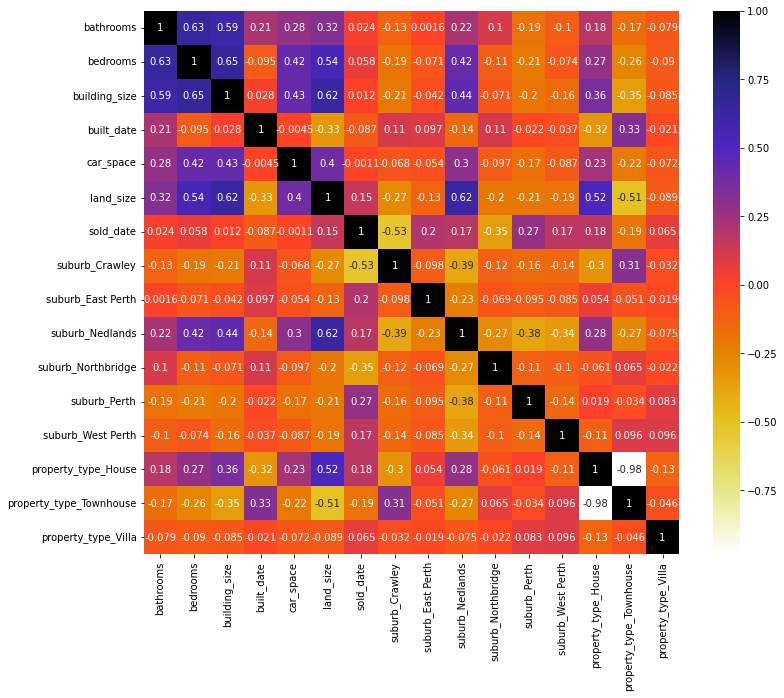

In [368]:
import seaborn  as sns
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot = True, cmap= plt.cm.CMRmap_r)

In [373]:
X_train.columns

Index(['bathrooms', 'bedrooms', 'building_size', 'built_date', 'car_space',
       'land_size', 'sold_date', 'suburb_Crawley', 'suburb_East Perth',
       'suburb_Nedlands', 'suburb_Northbridge', 'suburb_Perth',
       'suburb_West Perth', 'property_type_House', 'property_type_Townhouse',
       'property_type_Villa'],
      dtype='object')

In [374]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [375]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

1

In [376]:
corr_features

{'property_type_Townhouse'}

In [377]:
X_train = X_train.drop(corr_features, axis=1)

In [378]:
X_train.columns

Index(['bathrooms', 'bedrooms', 'building_size', 'built_date', 'car_space',
       'land_size', 'sold_date', 'suburb_Crawley', 'suburb_East Perth',
       'suburb_Nedlands', 'suburb_Northbridge', 'suburb_Perth',
       'suburb_West Perth', 'property_type_House', 'property_type_Villa'],
      dtype='object')

In [379]:
X_train = X_train[['bathrooms', 'bedrooms', 'building_size', 'built_date', 'car_space',
       'land_size', 'sold_date', 'suburb_Crawley', 'suburb_East Perth',
       'suburb_Nedlands', 'suburb_Northbridge', 'suburb_Perth',
       'suburb_West Perth']]
X_train

,bathrooms,bedrooms,building_size,built_date,car_space,land_size,sold_date,suburb_Crawley,suburb_East Perth,suburb_Nedlands,suburb_Northbridge,suburb_Perth,suburb_West Perth
1152,2,4,109,1979,1,109,2020,0,0,1,0,0,0
146,3,4,321,1996,3,760,2020,0,0,0,0,1,0
1298,1,2,133,1935,2,999,2018,0,0,1,0,0,0
136,1,2,115,1982,3,602,2020,0,0,0,0,1,0
1367,2,3,909,1955,3,909,2017,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,3,4,300,2002,3,175,2021,0,1,0,0,0,0
1200,3,3,257,2019,2,1012,2020,0,0,1,0,0,0
489,1,3,120,1994,2,187,2019,0,0,0,0,0,1
1314,3,5,341,1989,2,883,2018,0,0,1,0,0,0


In [380]:
X_test = X_test[['bathrooms', 'bedrooms', 'building_size', 'built_date', 'car_space',
       'land_size', 'sold_date', 'suburb_Crawley', 'suburb_East Perth',
       'suburb_Nedlands', 'suburb_Northbridge', 'suburb_Perth',
       'suburb_West Perth']]
X_test

,bathrooms,bedrooms,building_size,built_date,car_space,land_size,sold_date,suburb_Crawley,suburb_East Perth,suburb_Nedlands,suburb_Northbridge,suburb_Perth,suburb_West Perth
1514,4,4,375,2007,2,243,2016,0,0,0,1,0,0
1194,3,4,377,2007,2,1012,2020,0,0,1,0,0,0
866,2,3,105,1990,2,168,2020,0,1,0,0,0,0
1541,1,2,102,1996,1,160,2015,0,0,0,1,0,0
1364,2,4,285,1955,2,1136,2018,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,3,138,2002,2,212,2020,0,0,0,0,1,0
1074,1,3,118,1926,1,607,2014,1,0,0,0,0,0
373,1,3,119,1920,2,402,2020,0,0,0,0,0,1
919,3,4,197,2012,3,210,2018,1,0,0,0,0,0


In [381]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [382]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [383]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression()

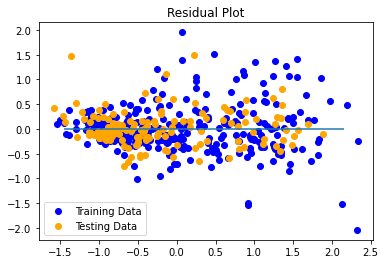

In [384]:
# Make predictions using a fitted model
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [385]:
#compare actual output values with predicted values
df1 = X_test
df1['Actual'] = y_test.reshape(1,-1)[0]
df1['Linear_Regression_Predicted'] = y_scaler.inverse_transform(model.predict(X_test_scaled))
df1.head(10)

,bathrooms,bedrooms,building_size,built_date,car_space,land_size,sold_date,suburb_Crawley,suburb_East Perth,suburb_Nedlands,suburb_Northbridge,suburb_Perth,suburb_West Perth,Actual,Linear_Regression_Predicted
1514,4,4,375,2007,2,243,2016,0,0,0,1,0,0,1250000,1.394531e+06
1194,3,4,377,2007,2,1012,2020,0,0,1,0,0,0,2100000,2.117251e+06
866,2,3,105,1990,2,168,2020,0,1,0,0,0,0,445000,7.884816e+05
1541,1,2,102,1996,1,160,2015,0,0,0,1,0,0,608000,3.995108e+05
1364,2,4,285,1955,2,1136,2018,0,0,1,0,0,0,2125000,1.983302e+06
273,2,3,102,1920,2,357,2020,0,0,0,0,1,0,820000,9.357392e+05
133,1,2,79,1918,0,378,2020,0,0,0,0,1,0,615000,6.608471e+05
1265,2,3,230,2001,2,461,2019,0,0,1,0,0,0,1350000,1.256473e+06
1355,2,3,134,1981,6,145,2018,0,0,1,0,0,0,910000,9.956418e+05
418,2,2,98,1980,2,150,2020,0,0,0,0,0,1,458000,5.823363e+05


In [386]:
# Fit the model to the training data and calculate the scores for the training and testing data

training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7848590808596545
Testing Score: 0.8431797052870907


In [387]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.1269061464829727, R2: 0.8431797052870907


# LASSO model

In [388]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

lasso_predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, lasso_predictions) #error to a model (closer to 0 the better)
r2 = lasso.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.12828190230587266, R2: 0.8414796581295708


In [389]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(alpha=alpha)

lasso_grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

lasso_grid_result = lasso_grid.fit(X_train_scaled, y_train_scaled)

# lasso_grid_predictions = lasso_grid_model(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, lasso_grid_predictions) #error to a model (closer to 0 the better)
# r2 = lasso_grid_model.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

# print(f"MSE: {MSE}, R2: {r2}")
print('Best Score: ', lasso_grid_result.best_score_)
print('Best Params: ', lasso_grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.7366381723874064
Best Params:  {'alpha': 0.01}


In [390]:
best_lasso = Lasso(alpha=0.01).fit(X_train_scaled, y_train_scaled)

best_lasso_predictions = best_lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, best_lasso_predictions)
r2 = best_lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.12828190230587266, R2: 0.8414796581295708


In [391]:
df1['Lasso_Predicted'] = y_scaler.inverse_transform(best_lasso.predict(X_test_scaled))
df1.head(10)

,bathrooms,bedrooms,building_size,built_date,car_space,land_size,sold_date,suburb_Crawley,suburb_East Perth,suburb_Nedlands,suburb_Northbridge,suburb_Perth,suburb_West Perth,Actual,Linear_Regression_Predicted,Lasso_Predicted
1514,4,4,375,2007,2,243,2016,0,0,0,1,0,0,1250000,1.394531e+06,1.401013e+06
1194,3,4,377,2007,2,1012,2020,0,0,1,0,0,0,2100000,2.117251e+06,2.106474e+06
866,2,3,105,1990,2,168,2020,0,1,0,0,0,0,445000,7.884816e+05,7.852482e+05
1541,1,2,102,1996,1,160,2015,0,0,0,1,0,0,608000,3.995108e+05,4.471544e+05
1364,2,4,285,1955,2,1136,2018,0,0,1,0,0,0,2125000,1.983302e+06,1.989057e+06
273,2,3,102,1920,2,357,2020,0,0,0,0,1,0,820000,9.357392e+05,9.365405e+05
133,1,2,79,1918,0,378,2020,0,0,0,0,1,0,615000,6.608471e+05,6.755915e+05
1265,2,3,230,2001,2,461,2019,0,0,1,0,0,0,1350000,1.256473e+06,1.258020e+06
1355,2,3,134,1981,6,145,2018,0,0,1,0,0,0,910000,9.956418e+05,9.858144e+05
418,2,2,98,1980,2,150,2020,0,0,0,0,0,1,458000,5.823363e+05,5.964042e+05


# Ridge model

In [392]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

ridge_predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, ridge_predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.12690658524864534, R2: 0.8431791630961567


In [393]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(alpha=alpha)

ridge_grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

ridge_grid_result = ridge_grid.fit(X_train_scaled, y_train_scaled)

# ridge_grid_predictions = ridge_grid(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, ridge_grid_predictions) #error to a model (closer to 0 the better)
# r2 = ridge_grid.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

# print(f"MSE: {MSE}, R2: {r2}")
print('Best Score: ', ridge_grid_result.best_score_)
print('Best Params: ', ridge_grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.7433270213736556
Best Params:  {'alpha': 100}


In [394]:
best_ridge = Ridge(alpha=100).fit(X_train_scaled, y_train_scaled)

best_ridge_predictions = best_ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, best_ridge_predictions)
r2 = best_ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.14238469137020945, R2: 0.8240525783652347


In [395]:
df1['Ridge_Predicted'] = y_scaler.inverse_transform(best_ridge.predict(X_test_scaled))
df1.head(10)

,bathrooms,bedrooms,building_size,built_date,car_space,land_size,sold_date,suburb_Crawley,suburb_East Perth,suburb_Nedlands,suburb_Northbridge,suburb_Perth,suburb_West Perth,Actual,Linear_Regression_Predicted,Lasso_Predicted,Ridge_Predicted
1514,4,4,375,2007,2,243,2016,0,0,0,1,0,0,1250000,1.394531e+06,1.401013e+06,1.396313e+06
1194,3,4,377,2007,2,1012,2020,0,0,1,0,0,0,2100000,2.117251e+06,2.106474e+06,1.985590e+06
866,2,3,105,1990,2,168,2020,0,1,0,0,0,0,445000,7.884816e+05,7.852482e+05,8.385938e+05
1541,1,2,102,1996,1,160,2015,0,0,0,1,0,0,608000,3.995108e+05,4.471544e+05,4.544648e+05
1364,2,4,285,1955,2,1136,2018,0,0,1,0,0,0,2125000,1.983302e+06,1.989057e+06,1.868760e+06
273,2,3,102,1920,2,357,2020,0,0,0,0,1,0,820000,9.357392e+05,9.365405e+05,9.628067e+05
133,1,2,79,1918,0,378,2020,0,0,0,0,1,0,615000,6.608471e+05,6.755915e+05,6.592111e+05
1265,2,3,230,2001,2,461,2019,0,0,1,0,0,0,1350000,1.256473e+06,1.258020e+06,1.283627e+06
1355,2,3,134,1981,6,145,2018,0,0,1,0,0,0,910000,9.956418e+05,9.858144e+05,1.176597e+06
418,2,2,98,1980,2,150,2020,0,0,0,0,0,1,458000,5.823363e+05,5.964042e+05,6.416748e+05


# ElasticNet model

In [396]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

elas_predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, elas_predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.12748527505099683, R2: 0.8424640653024946


In [397]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(alpha=alpha)

elasticnet_grid = GridSearchCV(estimator=elasticnet, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

elasticnet_grid_result= elasticnet_grid.fit(X_train_scaled, y_train_scaled)

# elasticnet_grid_predictions = elasticnet_grid(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, elasticnet_grid_predictions) #error to a model (closer to 0 the better)
# r2 = elasticnet_grid.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

# print(f"MSE: {MSE}, R2: {r2}")
print('Best Score: ', elasticnet_grid_result.best_score_)
print('Best Params: ', elasticnet_grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.7368769515251679
Best Params:  {'alpha': 0.01}


In [399]:
best_elasticnet = ElasticNet(alpha=0.01).fit(X_train_scaled, y_train_scaled)

best_elasticnet_predictions = best_elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, best_elasticnet_predictions)
r2 = best_elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.12748527505099683, R2: 0.8424640653024946


In [400]:
df1['elasticnet_Predicted'] = y_scaler.inverse_transform(best_elasticnet.predict(X_test_scaled))
df1.head(10)

,bathrooms,bedrooms,building_size,built_date,car_space,land_size,sold_date,suburb_Crawley,suburb_East Perth,suburb_Nedlands,suburb_Northbridge,suburb_Perth,suburb_West Perth,Actual,Linear_Regression_Predicted,Lasso_Predicted,Ridge_Predicted,elasticnet_Predicted
1514,4,4,375,2007,2,243,2016,0,0,0,1,0,0,1250000,1.394531e+06,1.401013e+06,1.396313e+06,1.398206e+06
1194,3,4,377,2007,2,1012,2020,0,0,1,0,0,0,2100000,2.117251e+06,2.106474e+06,1.985590e+06,2.108508e+06
866,2,3,105,1990,2,168,2020,0,1,0,0,0,0,445000,7.884816e+05,7.852482e+05,8.385938e+05,7.897009e+05
1541,1,2,102,1996,1,160,2015,0,0,0,1,0,0,608000,3.995108e+05,4.471544e+05,4.544648e+05,4.238165e+05
1364,2,4,285,1955,2,1136,2018,0,0,1,0,0,0,2125000,1.983302e+06,1.989057e+06,1.868760e+06,1.983314e+06
273,2,3,102,1920,2,357,2020,0,0,0,0,1,0,820000,9.357392e+05,9.365405e+05,9.628067e+05,9.369173e+05
133,1,2,79,1918,0,378,2020,0,0,0,0,1,0,615000,6.608471e+05,6.755915e+05,6.592111e+05,6.677814e+05
1265,2,3,230,2001,2,461,2019,0,0,1,0,0,0,1350000,1.256473e+06,1.258020e+06,1.283627e+06,1.258080e+06
1355,2,3,134,1981,6,145,2018,0,0,1,0,0,0,910000,9.956418e+05,9.858144e+05,1.176597e+06,9.962328e+05
418,2,2,98,1980,2,150,2020,0,0,0,0,0,1,458000,5.823363e+05,5.964042e+05,6.416748e+05,5.903339e+05


# Save the best Model

In [404]:
import joblib
joblib.dump(model, "best_with correlation_model.pkl")

['best_with correlation_model.pkl']

In [405]:
my_model = joblib.load("best_with correlation_model.pkl")


MAE: 0.2600635692240566
MSE: 0.1269061464829727
RMSE: 0.3562388896274138
VarScore: 0.8433535071855377


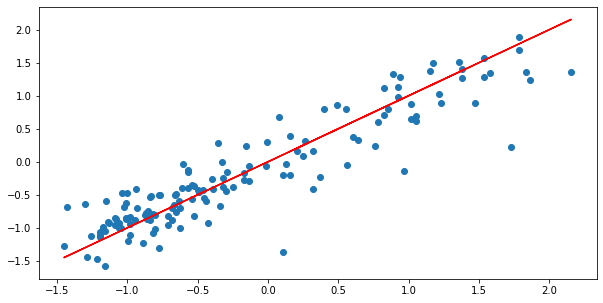

In [406]:
y_pred = my_model.predict(X_test_scaled)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_scaled, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test_scaled, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_scaled, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test_scaled,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test_scaled,y_pred)
# Perfect predictions
plt.plot(y_test_scaled,y_test_scaled,'r')